In [1]:
import xarray as xr
import proplot as pplt
import pandas as pd
import numpy as np
from pathlib import Path

from AOSCMcoupling.files import OIFSPreprocessor, NEMOPreprocessor

In [2]:
start_date = pd.Timestamp("2014-07-01")
oifs_preprocessor = OIFSPreprocessor(
    start_date, np.timedelta64(-7, "h")
)
nemo_preprocessor = NEMOPreprocessor(
    start_date, np.timedelta64(-7, "h")
)

In [3]:
plotting_output_dir = Path("plots/CEX")
plotting_output_dir.mkdir(exist_ok=True)

In [4]:
ece4_dir = Path("output")
ece3_dir = Path("PAPA")

In [5]:
def load_datasets(output_dir, exp_ids):
    oifs_progvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/progvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    oifs_diagvar = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/diagvar.nc", preprocess=oifs_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_t_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_T*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_u_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_U*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    nemo_v_grids = [
        xr.open_mfdataset(
            f"{output_dir}/{exp_id}/{exp_id[:4]}*_V*.nc", preprocess=nemo_preprocessor.preprocess
        )
        for exp_id in exp_ids
    ]
    return oifs_progvar, oifs_diagvar, nemo_t_grids, nemo_u_grids, nemo_v_grids

In [6]:
exp_ids = ["CEX0", "CEX1", "CEX2", "CEXS_30"]
oifs_progvar_3, oifs_diagvar_3, nemo_t_grids_3, nemo_u_grids_3, nemo_v_grids_3 = load_datasets(Path("PAPA"), exp_ids)

exp_ids = ["C430", "C431", "C432", "C43S_30"]
oifs_progvar_43, oifs_diagvar_43, nemo_t_grids_43, nemo_u_grids_43, nemo_v_grids_43 = load_datasets(Path("PAPA"), exp_ids)

exp_ids = ["CEX0", "CEX1", "CEX2", "CEXS_30"]
oifs_progvar_4, oifs_diagvar_4, nemo_t_grids_4, nemo_u_grids_4, nemo_v_grids_4 = load_datasets(Path("output"), exp_ids)

## Boundary Layer Type

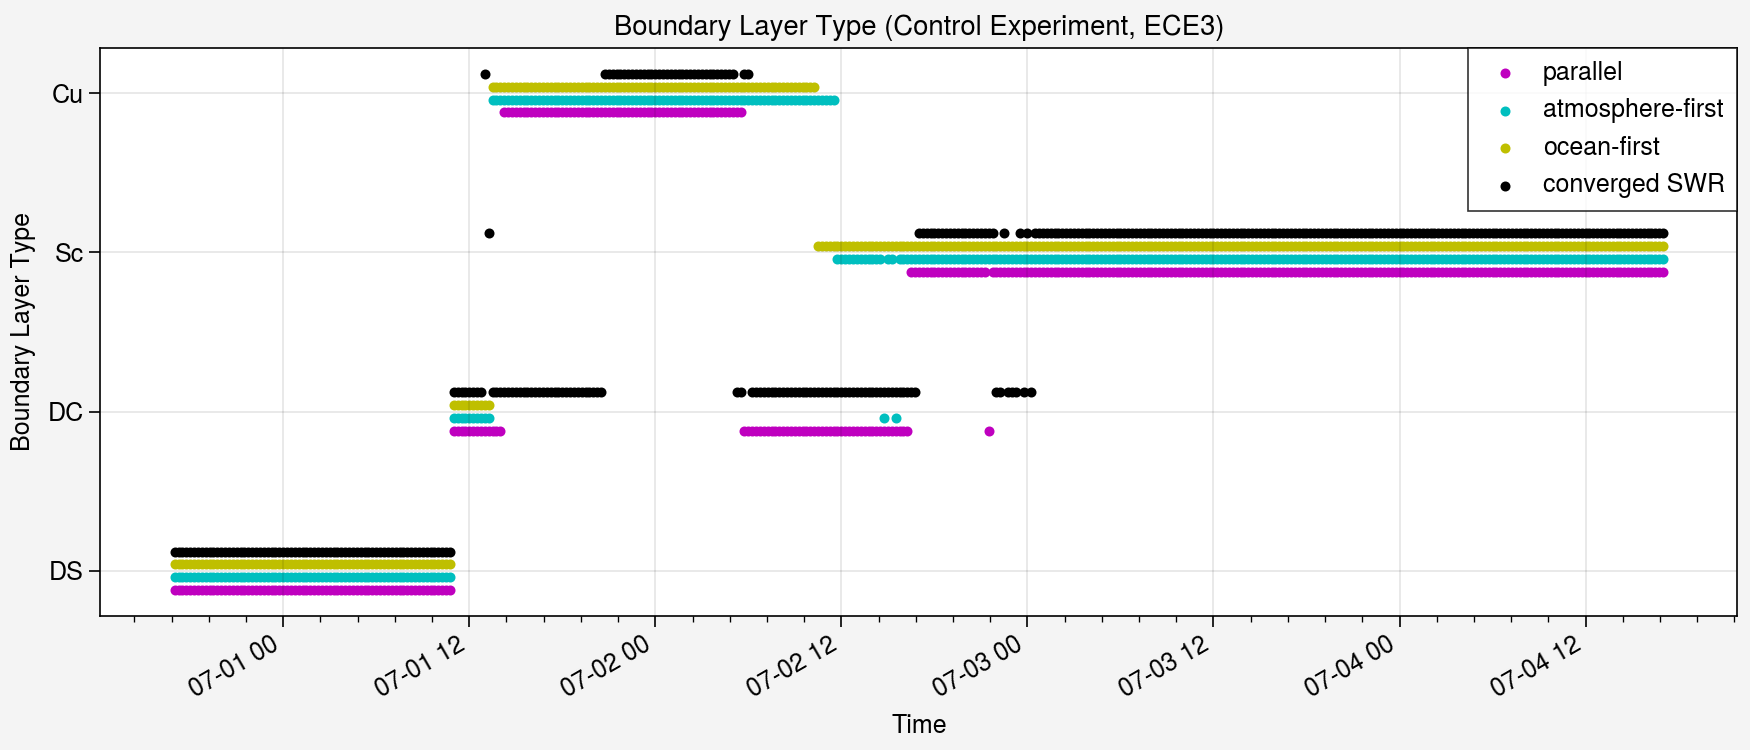

In [10]:
fig, ax = pplt.subplots(width="70em", height="30em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.12, -0.04, 0.04, 0.12]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    shift = shifts[i]
    ax.scatter(
        oifs_diagvar.pbl_type + shift,
        color=color,
        label=label,
        marker=".",
    )
ax.format(
    title="Boundary Layer Type (Control Experiment, ECE3)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

fig.savefig(plotting_output_dir / "ece3_pbl_types.pdf")

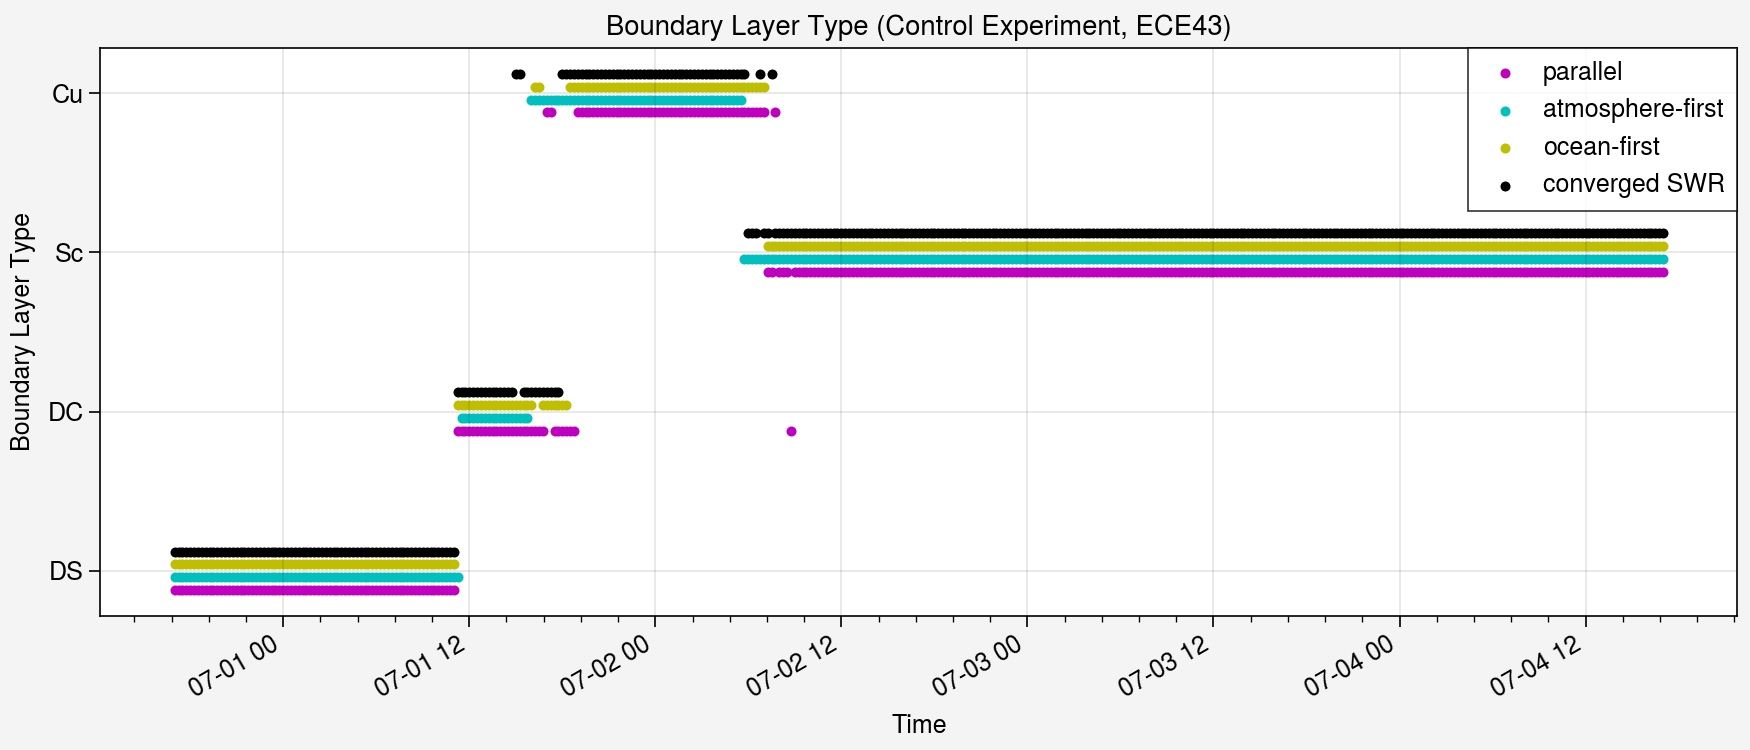

In [11]:
fig, ax = pplt.subplots(width="70em", height="30em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.12, -0.04, 0.04, 0.12]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_43[i]
    color = colors[i]
    label = labels[i]
    shift = shifts[i]
    ax.scatter(
        oifs_diagvar.pbl_type + shift,
        color=color,
        label=label,
        marker=".",
    )
ax.format(
    title="Boundary Layer Type (Control Experiment, ECE43)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

fig.savefig(plotting_output_dir / "ece43_pbl_types.pdf")

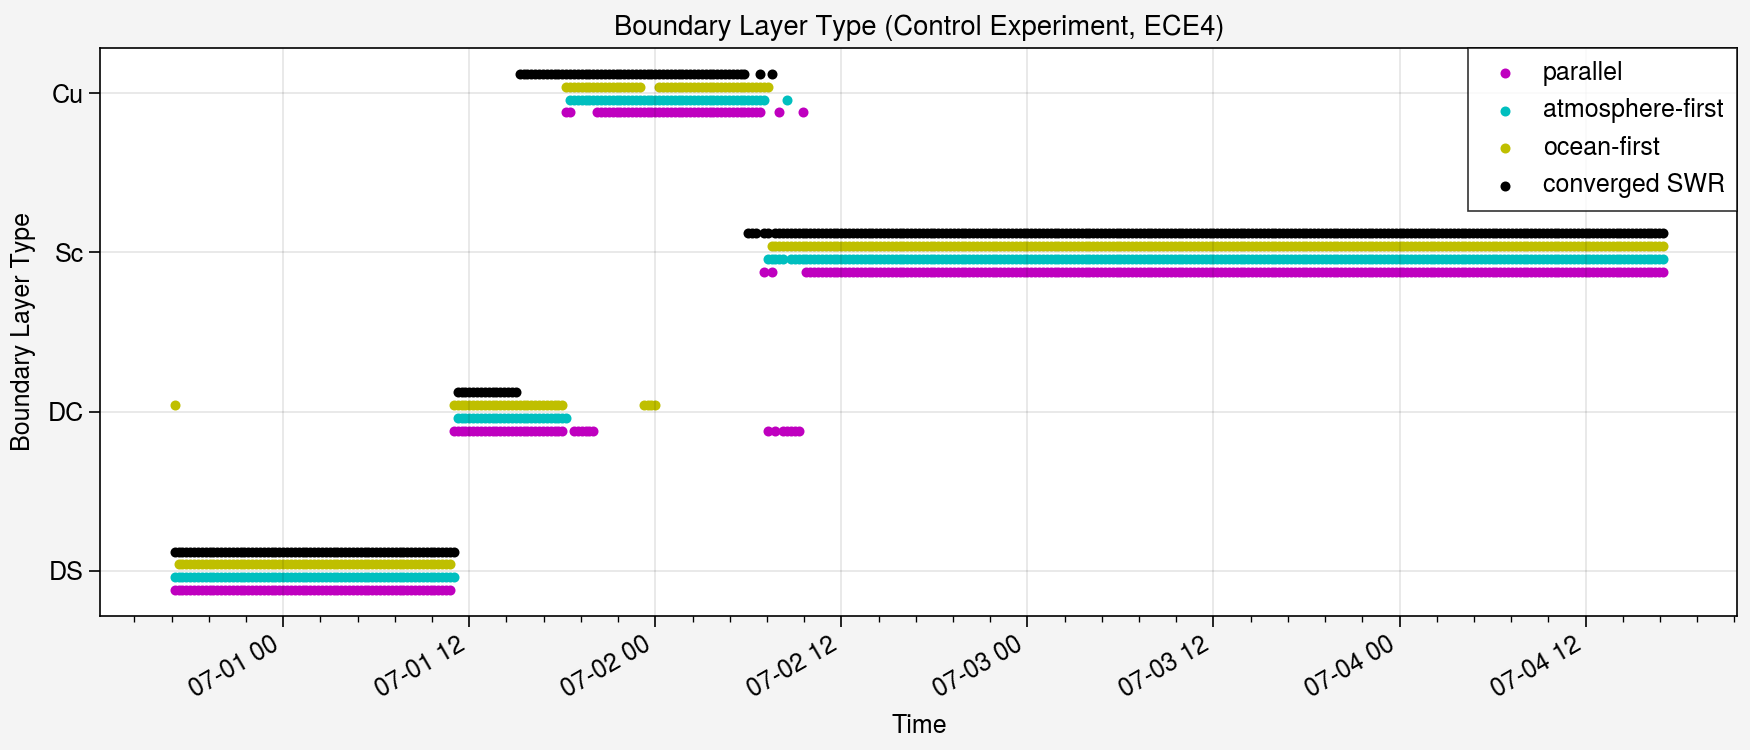

In [12]:
fig, ax = pplt.subplots(width="70em", height="30em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
shifts = [-0.12, -0.04, 0.04, 0.12]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_4[i]
    color = colors[i]
    label = labels[i]
    shift = shifts[i]
    ax.scatter(
        oifs_diagvar.pbl_type + shift,
        color=color,
        label=label,
        marker=".",
    )
ax.format(
    title="Boundary Layer Type (Control Experiment, ECE4)",
    ylabel="Boundary Layer Type",
    yticks=[0, 1, 2, 3],
    yticklabels=["DS", "DC", "Sc", "Cu"],
    ytickminor=False,
    xrotation=30,
    xlabel="Time",
)
ax.legend(ncol=1)

fig.savefig(plotting_output_dir / "ece4_pbl_types.pdf")

## Surface Heat Fluxes

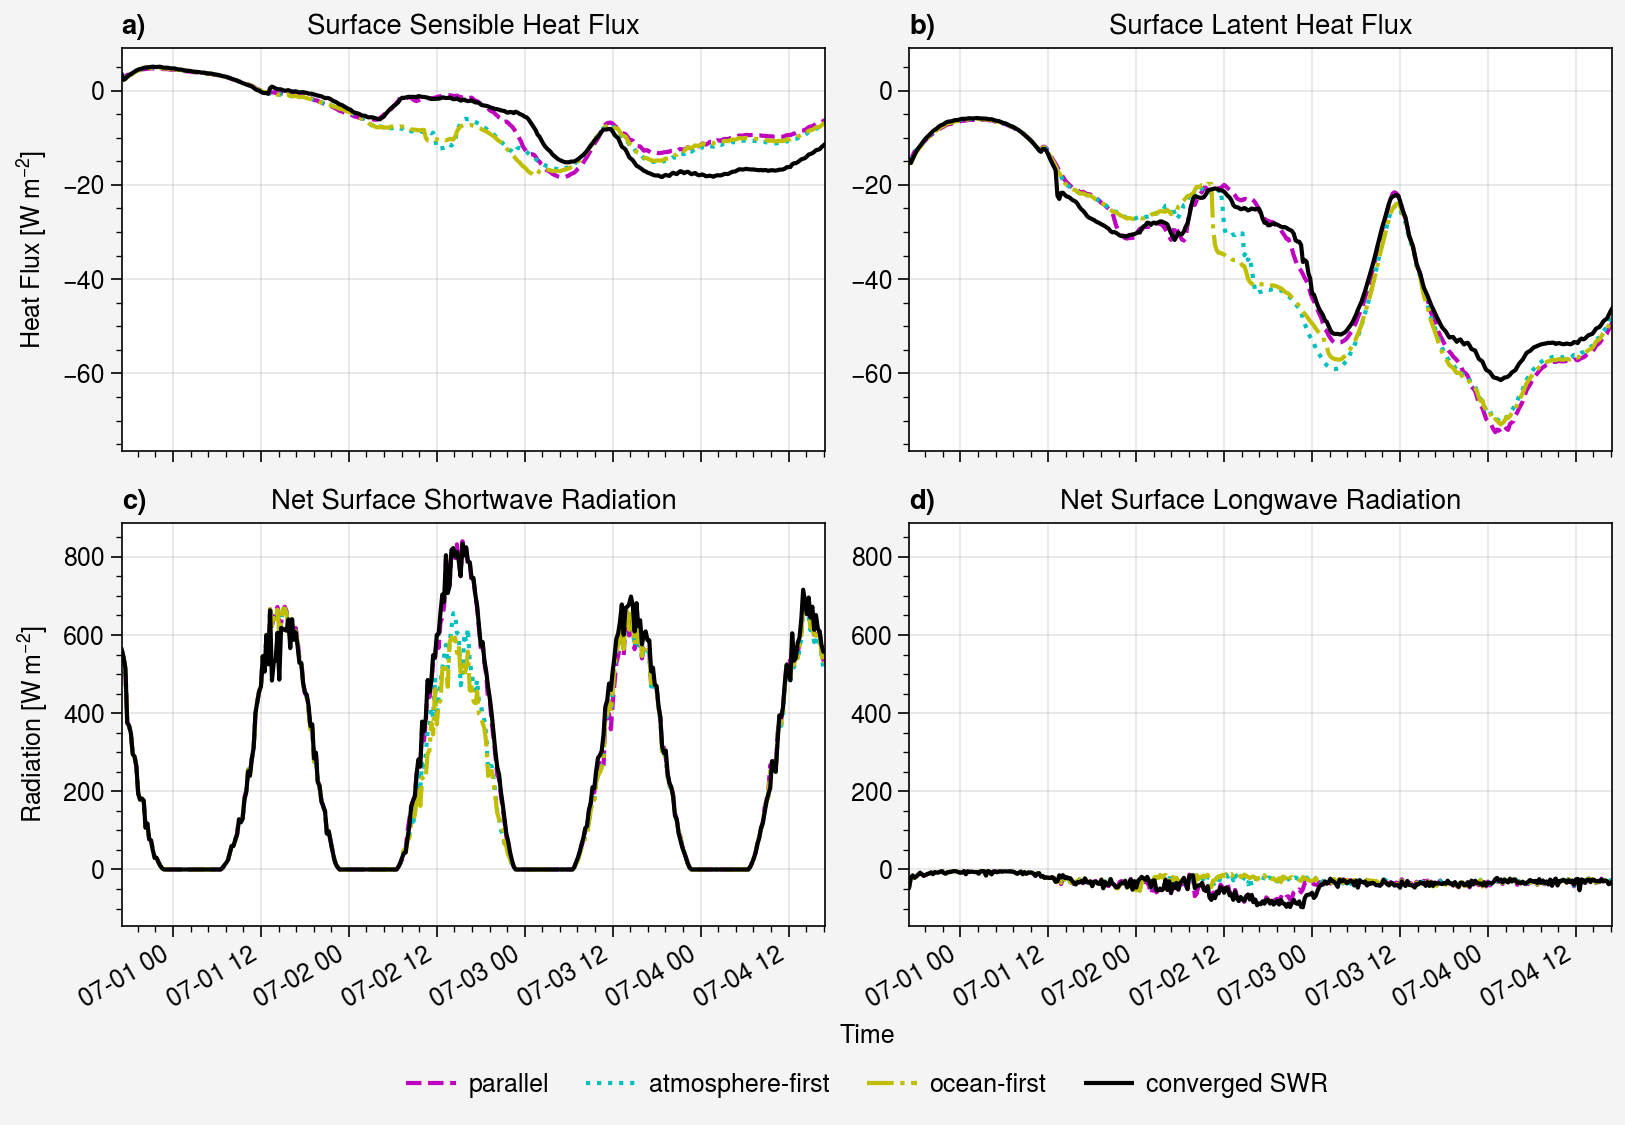

In [16]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
linestyles = ["--", ":", "-.", "-"]

fig, axs = pplt.subplots(
    nrows=2, ncols=2, height="45em", width="65em", sharey=2, spany=False
)

ims = []
ax = axs[0, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    im = ax.plot(
        oifs_diagvar.sfc_sen_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
    ims.append(im)
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$",
    title="Surface Sensible Heat Flux",
    xlabel="Time",
)

ax = axs[0, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lat_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$", title="Surface Latent Heat Flux", xlabel="Time"
)

ax = axs[1, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_swrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Shortwave Radiation",
    xlabel="Time",
)

ax = axs[1, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_3[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lwrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Longwave Radiation",
    xlabel="Time",
)

axs.format(abc="a)", xrotation=30)
fig.legend(ims, frame=False, ncols=4, loc="b")

fig.savefig(plotting_output_dir / "ece3_surface_heat_fluxes.pdf")

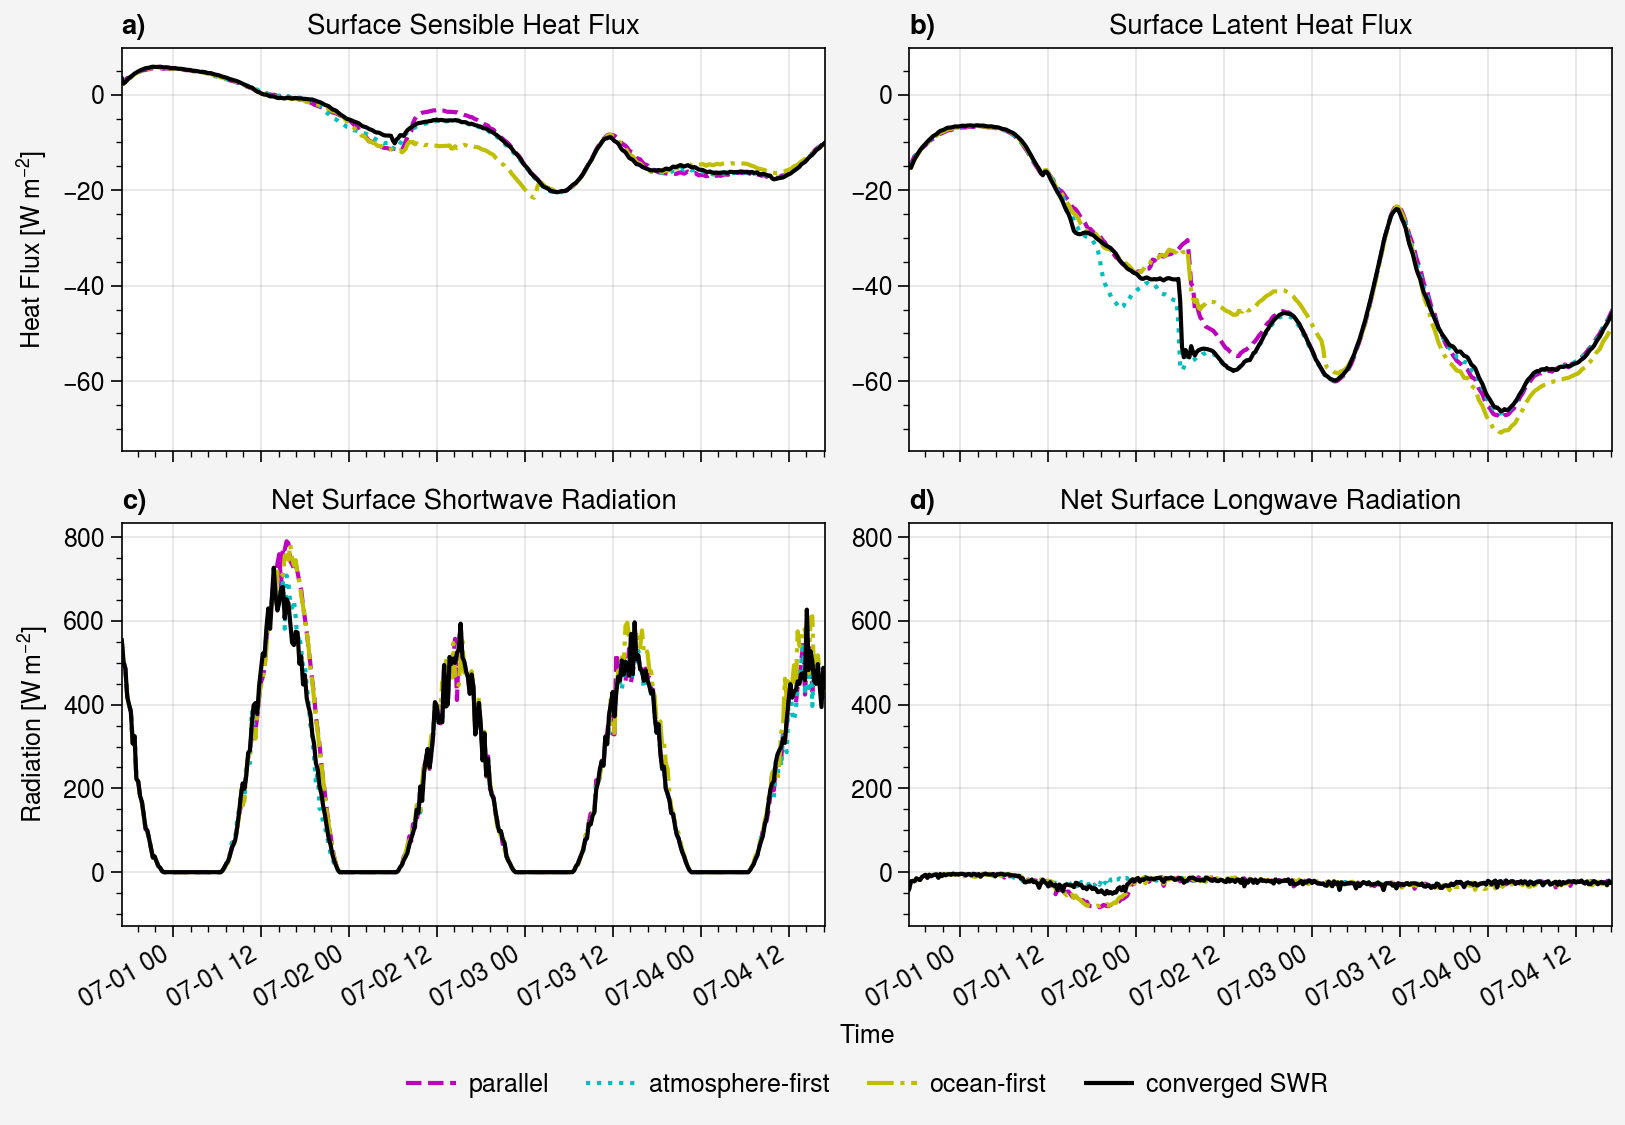

In [17]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
linestyles = ["--", ":", "-.", "-"]

fig, axs = pplt.subplots(
    nrows=2, ncols=2, height="45em", width="65em", sharey=2, spany=False
)

ims = []
ax = axs[0, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_43[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    im = ax.plot(
        oifs_diagvar.sfc_sen_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
    ims.append(im)
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$",
    title="Surface Sensible Heat Flux",
    xlabel="Time",
)

ax = axs[0, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_43[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lat_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$", title="Surface Latent Heat Flux", xlabel="Time"
)

ax = axs[1, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_43[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_swrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Shortwave Radiation",
    xlabel="Time",
)

ax = axs[1, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_43[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lwrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Longwave Radiation",
    xlabel="Time",
)

axs.format(abc="a)", xrotation=30)
fig.legend(ims, frame=False, ncols=4, loc="b")

fig.savefig(plotting_output_dir / "ece43_surface_heat_fluxes.pdf")

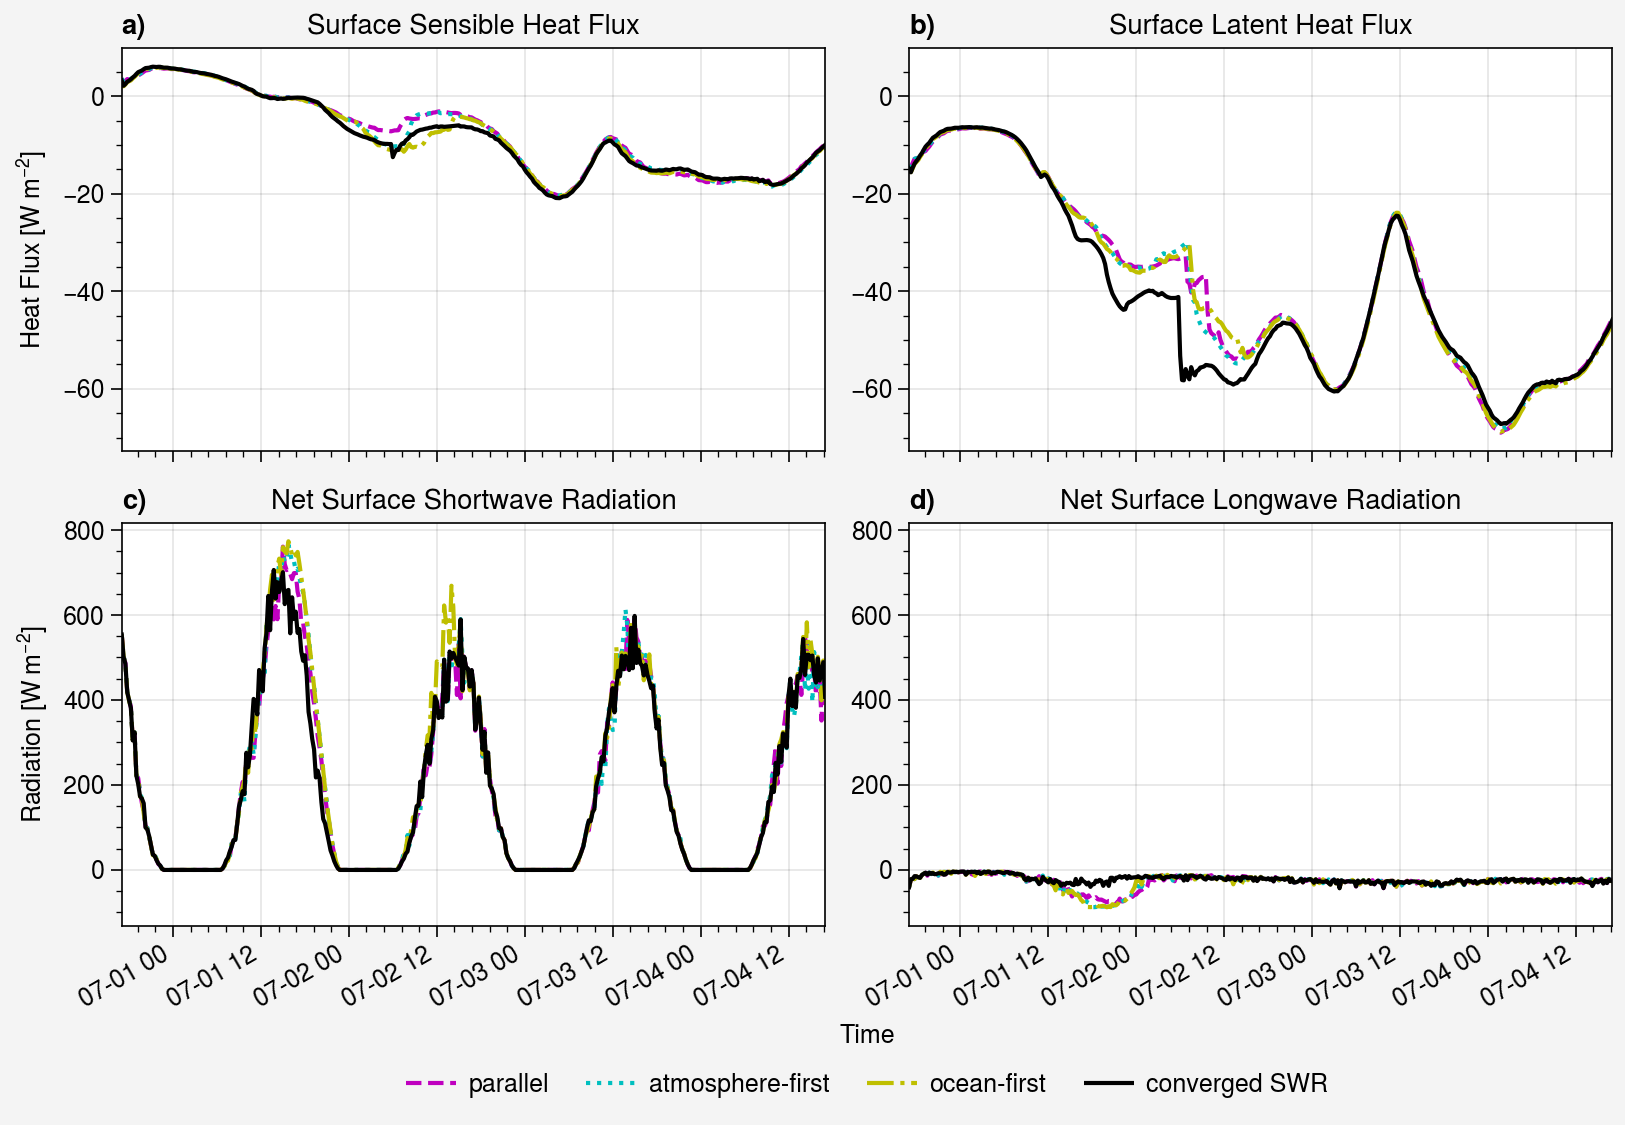

In [18]:
colors = ["m", "c", "y", "k"]
labels = ["parallel", "atmosphere-first", "ocean-first", "converged SWR"]
linestyles = ["--", ":", "-.", "-"]

fig, axs = pplt.subplots(
    nrows=2, ncols=2, height="45em", width="65em", sharey=2, spany=False
)

ims = []
ax = axs[0, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_4[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    im = ax.plot(
        oifs_diagvar.sfc_sen_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
    ims.append(im)
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$",
    title="Surface Sensible Heat Flux",
    xlabel="Time",
)

ax = axs[0, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_4[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lat_flx,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Heat Flux $[W \; m^{-2}]$", title="Surface Latent Heat Flux", xlabel="Time"
)

ax = axs[1, 0]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_4[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_swrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Shortwave Radiation",
    xlabel="Time",
)

ax = axs[1, 1]
for i in range(len(colors)):
    oifs_diagvar = oifs_diagvar_4[i]
    color = colors[i]
    label = labels[i]
    linestyle = linestyles[i]
    ax.plot(
        oifs_diagvar.sfc_lwrad,
        color=color,
        label=label,
        ls=linestyle,
    )
ax.format(
    ylabel=r"Radiation $[W \; m^{-2}]$",
    title="Net Surface Longwave Radiation",
    xlabel="Time",
)

axs.format(abc="a)", xrotation=30)
fig.legend(ims, frame=False, ncols=4, loc="b")

fig.savefig(plotting_output_dir / "ece4_surface_heat_fluxes.pdf")

## Vertical Temperature Profile

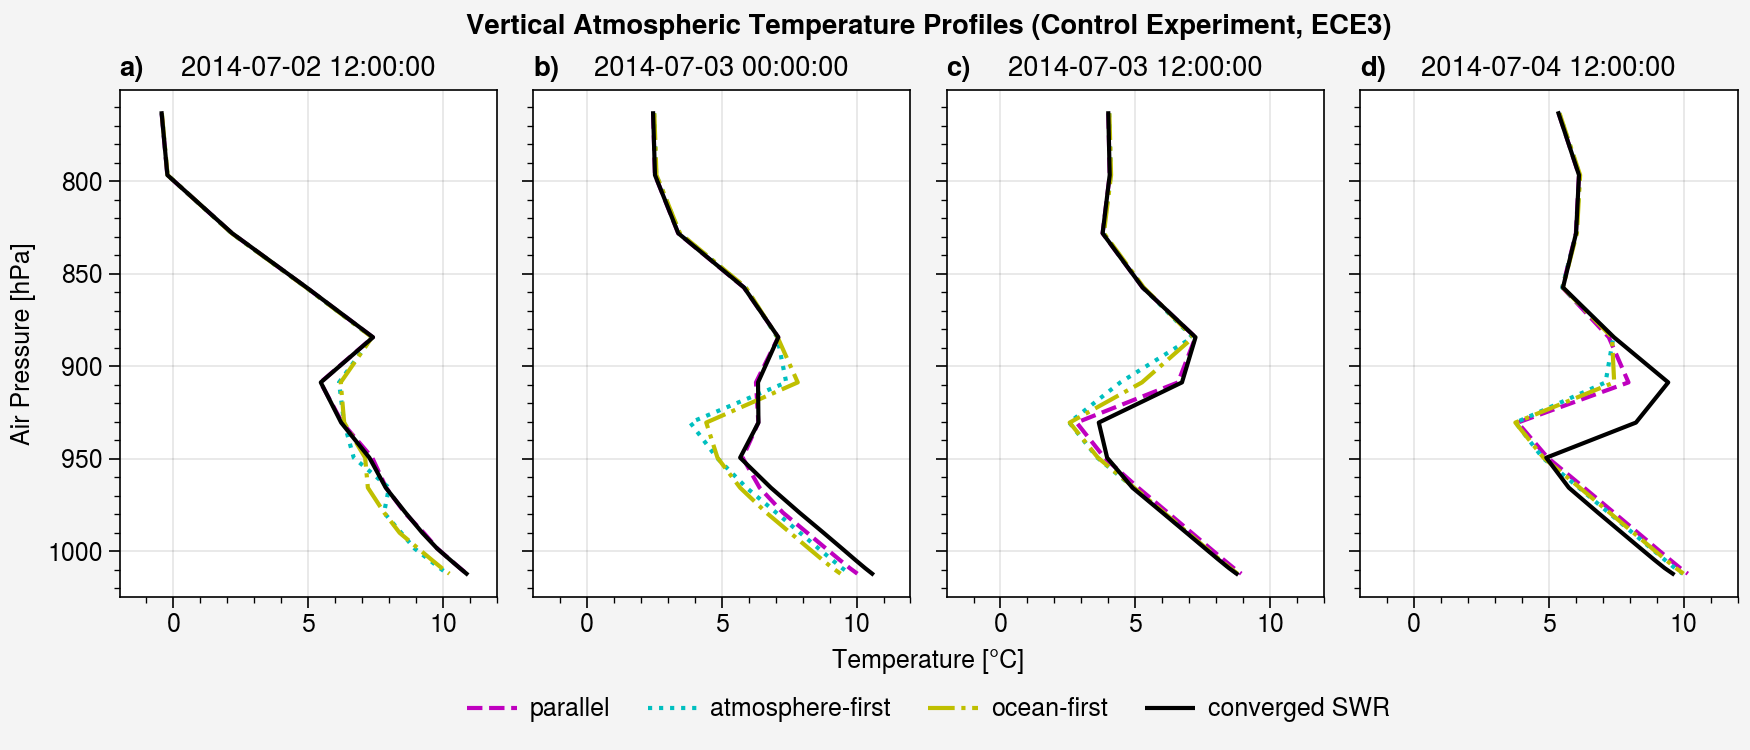

In [25]:
fig, axs = pplt.subplots(nrows=1, ncols=4, width="70em", height="30em")
axs.format(suptitle="Vertical Atmospheric Temperature Profiles (Control Experiment, ECE3)")
axs.format(abc="a)")
timestamps = [
    pd.Timestamp("2014-07-02 12:00"),
    pd.Timestamp("2014-07-03 00:00"),
    pd.Timestamp("2014-07-03 12:00"),
    pd.Timestamp("2014-07-04 12:00"),
]

ax = axs[0]
ims = []
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[0]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    im = ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ims.append(im)
    ax.format(title=timestamp)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[1]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[2]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[3]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)


for ax in axs:
    ax.format(
        xlabel="Temperature [°C]",
        ylabel="Air Pressure [hPa]",
        yreverse=True,
        xlim=[-2, 12],
    )

fig.legend(ims, frame=False, ncols=4, loc="b")
fig.savefig(plotting_output_dir / "ece3_air_temperature_stratification.pdf")

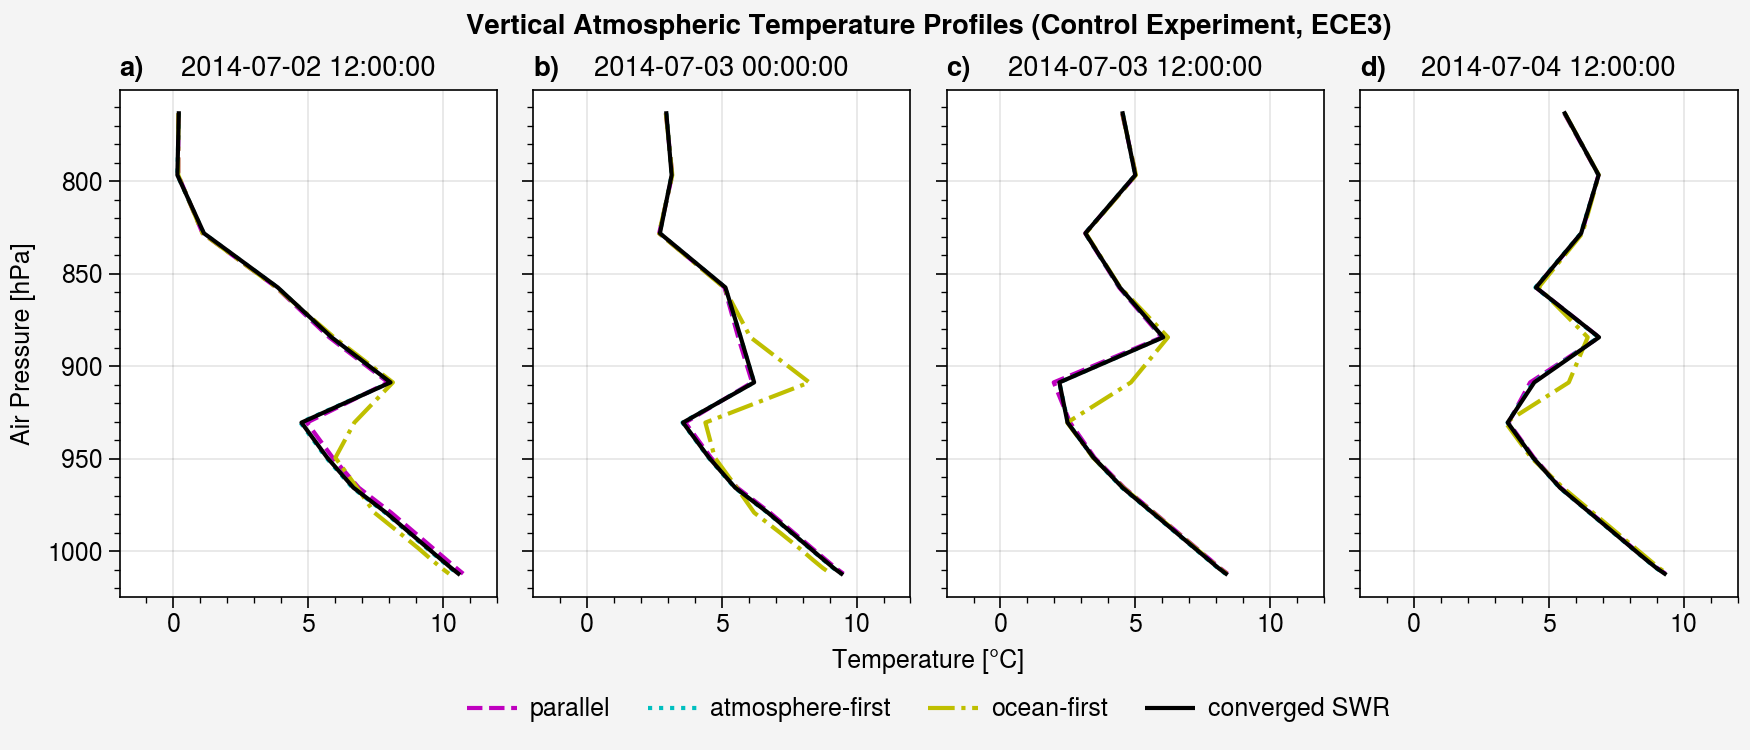

In [26]:
fig, axs = pplt.subplots(nrows=1, ncols=4, width="70em", height="30em")
axs.format(suptitle="Vertical Atmospheric Temperature Profiles (Control Experiment, ECE3)")
axs.format(abc="a)")
timestamps = [
    pd.Timestamp("2014-07-02 12:00"),
    pd.Timestamp("2014-07-03 00:00"),
    pd.Timestamp("2014-07-03 12:00"),
    pd.Timestamp("2014-07-04 12:00"),
]

ax = axs[0]
ims = []
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_43[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[0]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    im = ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ims.append(im)
    ax.format(title=timestamp)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_43[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[1]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_43[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[2]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_43[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[3]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)


for ax in axs:
    ax.format(
        xlabel="Temperature [°C]",
        ylabel="Air Pressure [hPa]",
        yreverse=True,
        xlim=[-2, 12],
    )

fig.legend(ims, frame=False, ncols=4, loc="b")
fig.savefig(plotting_output_dir / "ece43_air_temperature_stratification.pdf")

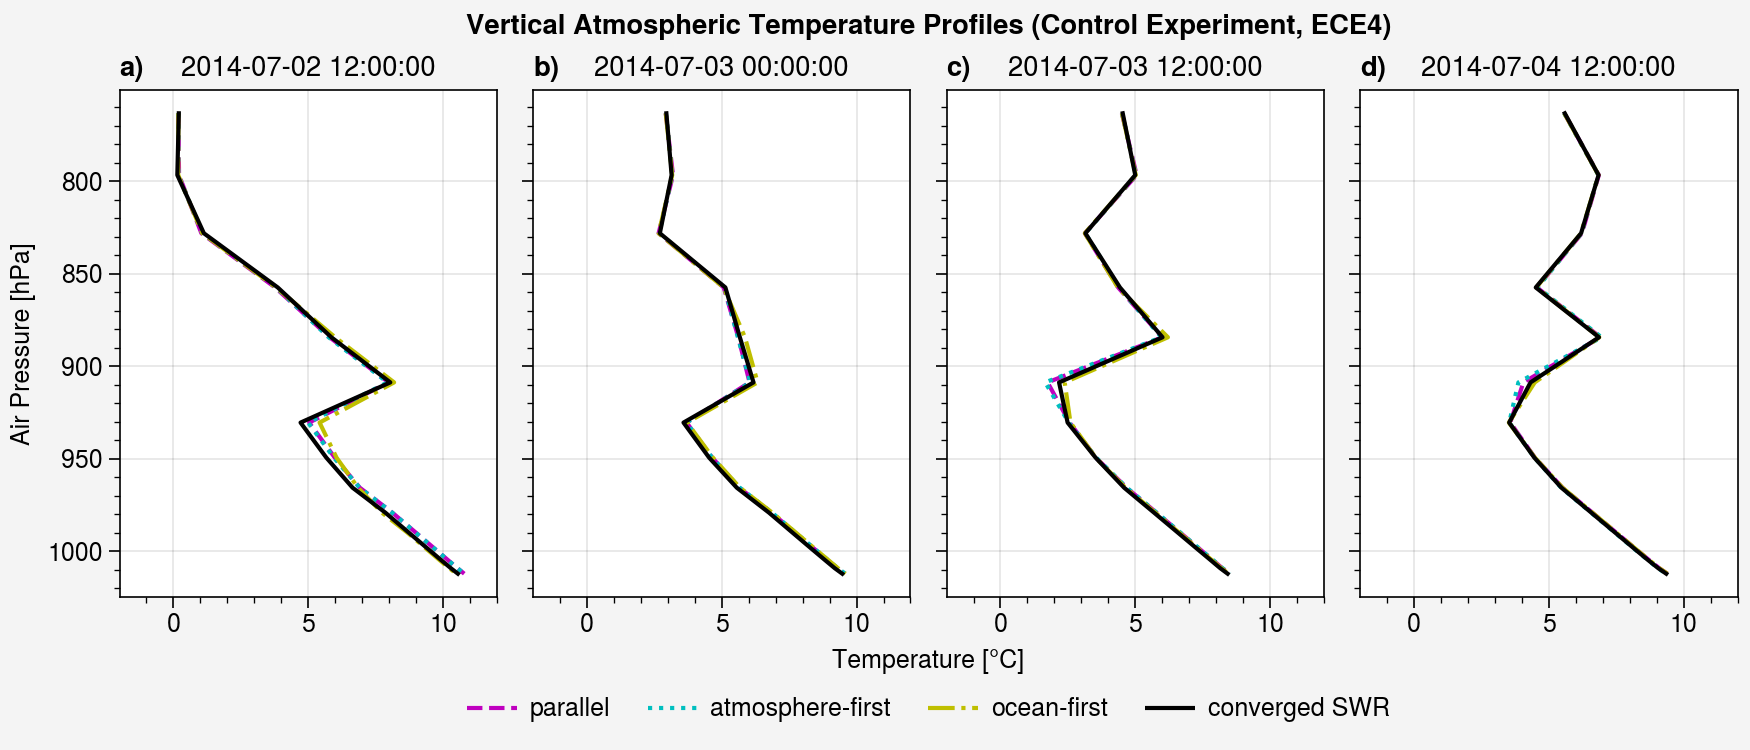

In [27]:
fig, axs = pplt.subplots(nrows=1, ncols=4, width="70em", height="30em")
axs.format(suptitle="Vertical Atmospheric Temperature Profiles (Control Experiment, ECE4)")
axs.format(abc="a)")
timestamps = [
    pd.Timestamp("2014-07-02 12:00"),
    pd.Timestamp("2014-07-03 00:00"),
    pd.Timestamp("2014-07-03 12:00"),
    pd.Timestamp("2014-07-04 12:00"),
]

ax = axs[0]
ims = []
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_4[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[0]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    im = ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ims.append(im)
    ax.format(title=timestamp)

ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_4[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[1]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[2]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_4[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[2]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)

ax = axs[3]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_4[i]
    oifs_progvar = oifs_progvar.assign_coords(
        air_pressure=("nlev", oifs_progvar.pressure_f[0].data / 100)
    )
    oifs_progvar = oifs_progvar.swap_dims({"nlev": "air_pressure"})
    timestamp = timestamps[3]
    t_for_plotting = oifs_progvar.t.sel(time=timestamp)[45:] - 273.15
    ax.plot(
        t_for_plotting,
        t_for_plotting.air_pressure,
        label=labels[i],
        color=colors[i],
        ls=linestyles[i],
    )
    ax.format(title=timestamp)


for ax in axs:
    ax.format(
        xlabel="Temperature [°C]",
        ylabel="Air Pressure [hPa]",
        yreverse=True,
        xlim=[-2, 12],
    )

fig.legend(ims, frame=False, ncols=4, loc="b")
fig.savefig(plotting_output_dir / "ece4_air_temperature_stratification.pdf")

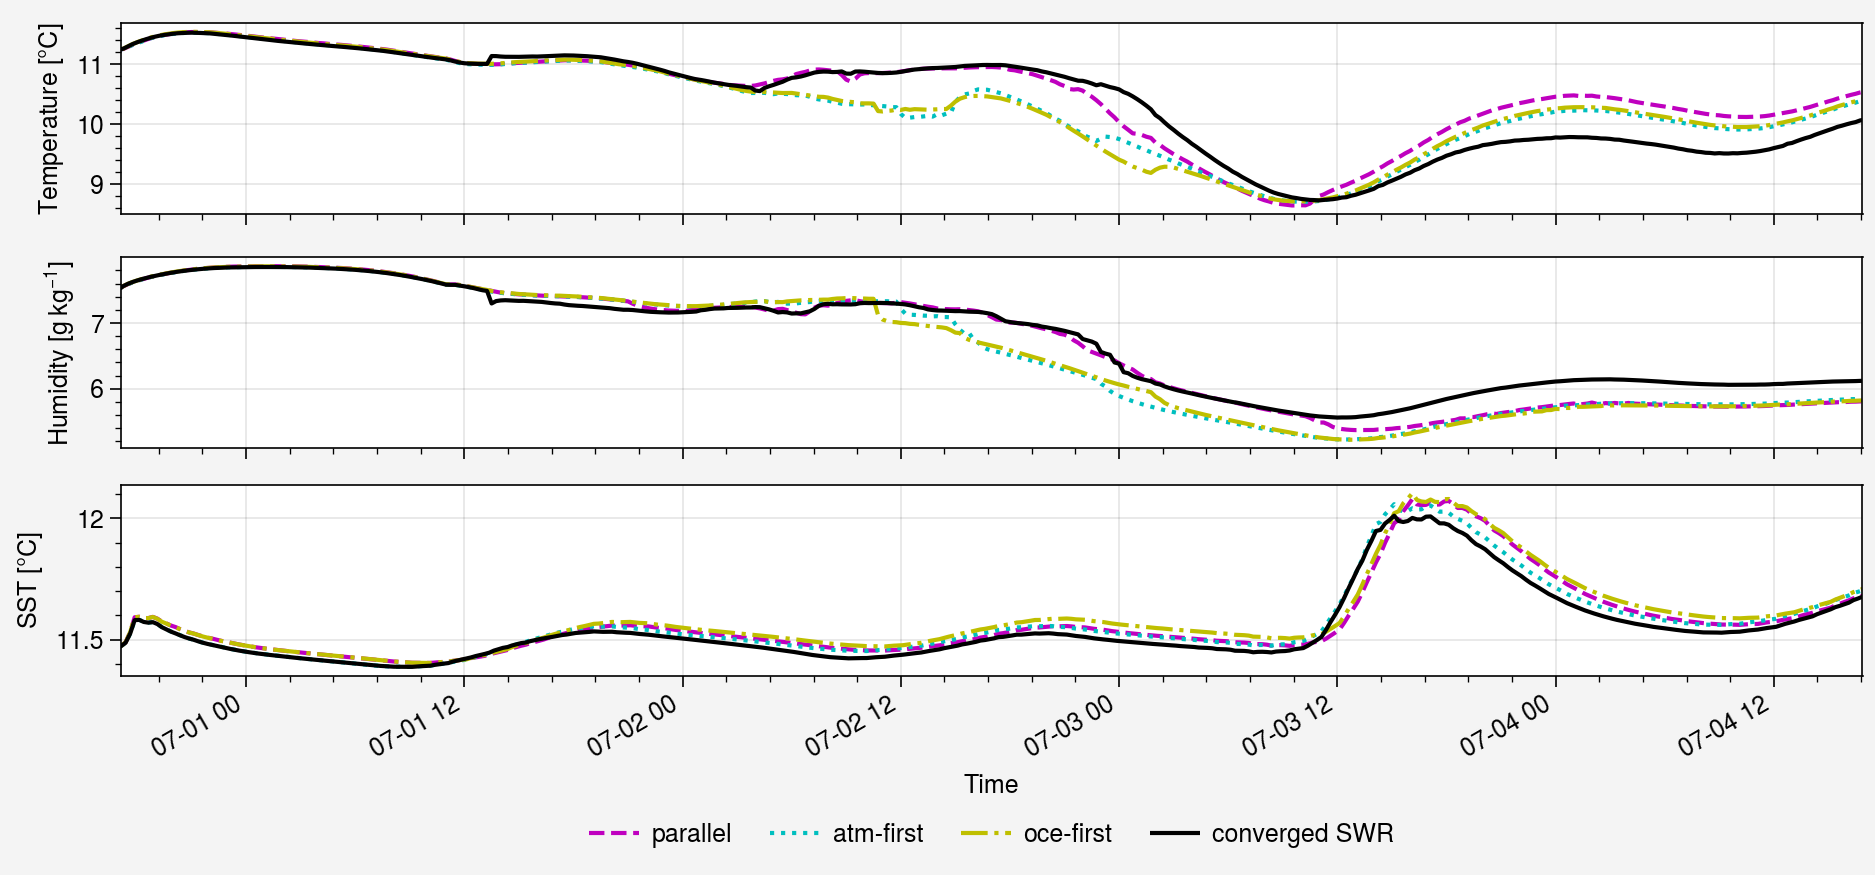

In [32]:
fig, axs = pplt.subplots(nrows=3, spany=False, height="35em", width="75em")

colors = ["m", "c", "y", "k"]
labels = ["parallel", "atm-first", "oce-first", "converged SWR"]
linestyles = ["--", ":", "-.", "-"]

ax = axs[0]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    ax.plot(
        oifs_progvar.t.sel(nlev=60) - 273.15,
        color=colors[i],
        label=labels[i],
        ls=linestyles[i],
    )
ax.format(ylabel="Temperature $[°C]$", title="", xlabel="Time")

hs = []
ax = axs[1]
for i in range(len(colors)):
    oifs_progvar = oifs_progvar_3[i]
    h = ax.plot(
        oifs_progvar.q.sel(nlev=60) * 1e3,
        color=colors[i],
        label=labels[i],
        ls=linestyles[i],
    )
    hs.append(h)
ax.format(ylabel="Humidity $[g\; kg^{{-1}}]$", title="", xlabel="Time")

ax = axs[2]
for i in range(len(colors)):
    nemo_t = nemo_t_grids_4[i]
    ax.plot(
        nemo_t.sosstsst,
        color=colors[i],
        label=labels[i],
        ls=linestyles[i],
    )
ax.format(ylabel="SST $[°C]$", title="", xlabel="Time", xrotation=30,)

fig.legend(hs, ncols=4, frame=False, loc="b")
fig.savefig(plotting_output_dir / "ece3_thermodynamic_progvars.pdf")